In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df = pd.read_csv(r'D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data\Data_UF_cleaned.csv', encoding = 'latin1')

## Time Series Index

In [73]:
# Convert 'Date' to Datetime and set as index
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df.set_index('Creation Date',inplace = True)


In [74]:
df.index

DatetimeIndex(['2023-12-03', '2023-12-03', '2023-12-03', '2023-12-04',
               '2023-12-04', '2023-12-05', '2023-12-05', '2023-12-05',
               '2023-12-06', '2023-12-06',
               ...
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09'],
              dtype='datetime64[ns]', name='Creation Date', length=28623, freq=None)

In [75]:
df.loc['2025-1']['Revenue']

Creation Date
2025-01-01     39900
2025-01-01     39900
2025-01-01     39900
2025-01-01    478800
2025-01-01     39900
               ...  
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
Name: Revenue, Length: 2224, dtype: int64

In [76]:
#Resampling to Monthly Frequancy and Calculate the mean closing price
df['Revenue'].resample('M').mean()

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_18992\3542015835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    1.016710e+06
2024-01-31    3.902732e+05
2024-02-29    3.248219e+05
2024-03-31    2.962077e+05
2024-04-30    2.659411e+05
2024-05-31    2.431337e+05
2024-06-30    2.204729e+05
2024-07-31    2.193446e+05
2024-08-31    1.930213e+05
2024-09-30    2.369266e+05
2024-10-31    2.114794e+05
2024-11-30    2.261028e+05
2024-12-31    9.387369e+04
2025-01-31    5.322990e+04
Freq: ME, Name: Revenue, dtype: float64

## EDA

In [77]:
# Filter and make a copy to avoid SettingWithCopyWarning
df = df[df['Sales Method'] != 'Bundle'].copy()
df.loc['2025']['Sales Method'].unique()

array(['Code', 'Extra'], dtype=object)

In [78]:
df[df['Revenue'] < 1].shape


(2031, 22)

<Axes: xlabel='Creation Date'>

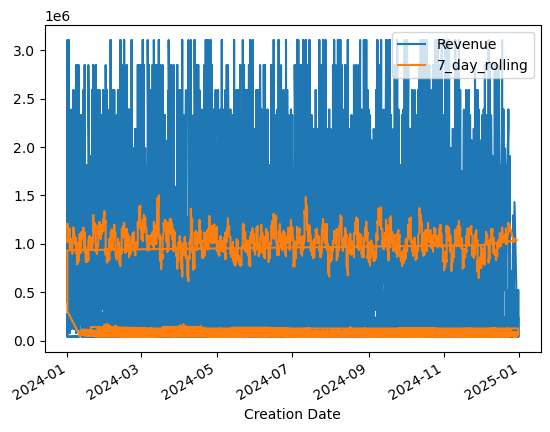

In [79]:
df = df[df['Revenue'] > 0] 
# Now safely calculate rolling average
df['7_day_rolling'] = df['Revenue'].rolling(window=30).mean()

# Plot for 2024
df[['Revenue', '7_day_rolling']].loc['2024'].plot()



C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_18992\2788216605.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum()['Revenue'].plot()


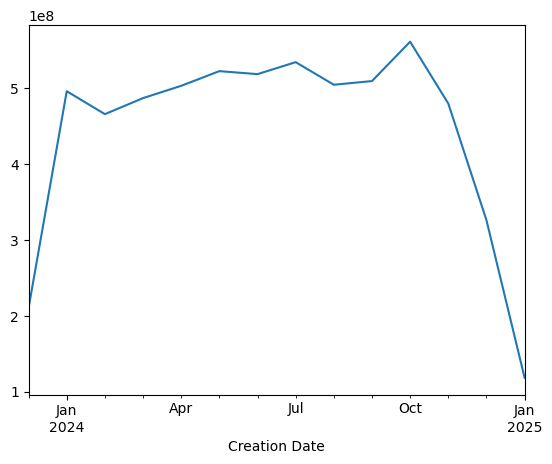

In [80]:
# Plot Yearly Volume
df.resample('M').sum()['Revenue'].plot()
plt.show()

In [81]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday
df['is_weekend'] = df.index.weekday > 4 # Check for weekend

df.head()

,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,OrderID/RegCode,Transaction Code,...,Internet Package,Cancellation Date,Sales Method,7_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Creation Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,SIM1000000952,0,56,04.Hai Phong,BTE,NaN,HBH,13.Tay Nguyen - Mien Trung,SIMORDER952,NaN,...,Giga F1,NaN,Extra,NaN,2023,12,3,Sunday,6,True
2023-12-03,SIM1000003875,0,28,06.Khanh Hoa,NBH,OBB,DNI,01.Ha Noi,SIMORDER3875,NaN,...,FTTH - Super500,NaN,Code,NaN,2023,12,3,Sunday,6,True
2023-12-03,SIM1000004226,0,25,10.Vung Tau,BTN,IBB,SLA,10.Vung Tau,SIMORDER4226,NaN,...,Sky,NaN,Code,NaN,2023,12,3,Sunday,6,True
2023-12-04,SIM1000002839,0,18,07.Ho Chi Minh,DLK,OBB,TGG,02.Quang Ninh,SIMORDER2839,NaN,...,Meta F2,NaN,Code,NaN,2023,12,4,Monday,0,False
2023-12-04,SIM1000003079,0,36,06.Khanh Hoa,HCM_03,CBB,HNI_02,10.Vung Tau,SIMORDER3079,NaN,...,FTTH - Super500,NaN,Code,NaN,2023,12,4,Monday,0,False


In [82]:
# Feature Enegineering - Lagged values
df['Revenue_lag1'] = df['Revenue'].shift(1)
df['Revenue_lag2'] = df['Revenue'].shift(2)

## Seasonal Decomposition

In [83]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
df['Revenue'].resample('M').mean()


C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_18992\1463569539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    1.016710e+06
2024-01-31    5.215954e+05
2024-02-29    4.308923e+05
2024-03-31    4.371323e+05
2024-04-30    3.558420e+05
2024-05-31    3.323756e+05
2024-06-30    2.908314e+05
2024-07-31    2.787290e+05
2024-08-31    3.054223e+05
2024-09-30    3.163927e+05
2024-10-31    3.212744e+05
2024-11-30    2.989347e+05
2024-12-31    1.807745e+05
2025-01-31    7.187814e+04
Freq: ME, Name: Revenue, dtype: float64

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_18992\3724341070.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Revenue'].resample('M').mean()


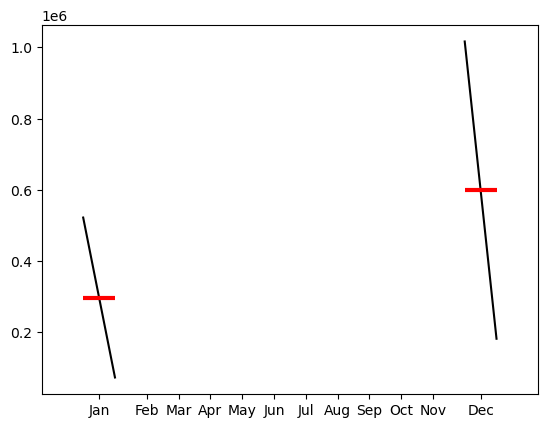

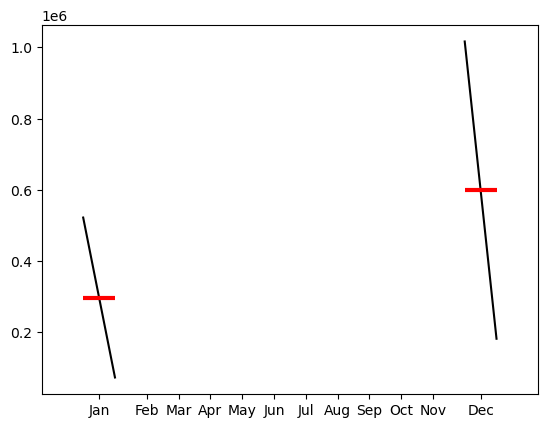

In [85]:
month_plot(df['Revenue'].resample('M').mean()
)

Due to the limited data range from December 2023 to January 2025, there is not enough information to identify or analyze seasonal patterns across months

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_18992\4159410850.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean().plot(marker='o', title="Monthly Revenue")


<Axes: title={'center': 'Monthly Revenue'}, xlabel='Creation Date'>

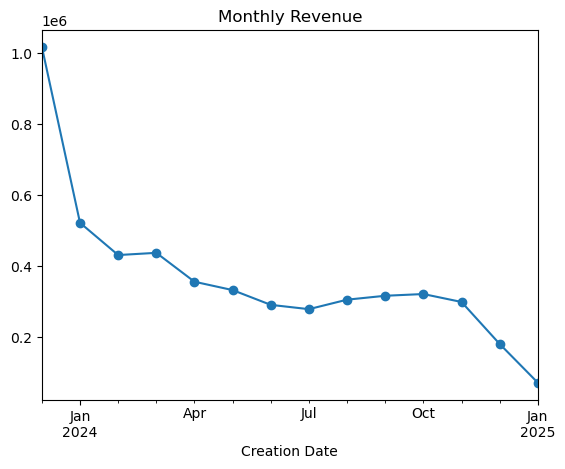

In [86]:
df['Revenue'].resample('M').mean().plot(marker='o', title="Monthly Revenue")


In [92]:
df.isnull().sum()


Contract_ID               2
Gender                    0
Age                       0
Region                    2
Managing Branch           2
Sales Unit            16143
Selling branch         1483
Sales Region           1483
OrderID/RegCode           2
Transaction Code      18849
Type                   1670
FG Package Command     5000
Payment Month             0
Revenue                   0
Sales Channel             0
Status FGame              0
Active Date             533
Service Start Date      638
Service End Date        638
Internet Package        533
Cancellation Date      7721
Sales Method              0
7_day_rolling            29
year                      0
month                     0
day                       0
weekday                   0
weekday_numeric           0
is_weekend                0
Revenue_lag1              1
Revenue_lag2              2
dtype: int64

In [109]:
df['Revenue'] = df['Revenue'].replace(0, np.nan)
df['Revenue'] = df['Revenue'].interpolate()


In [110]:
decomposition = seasonal_decompose(df['Revenue'], model = 'multiplicative',period = 365)

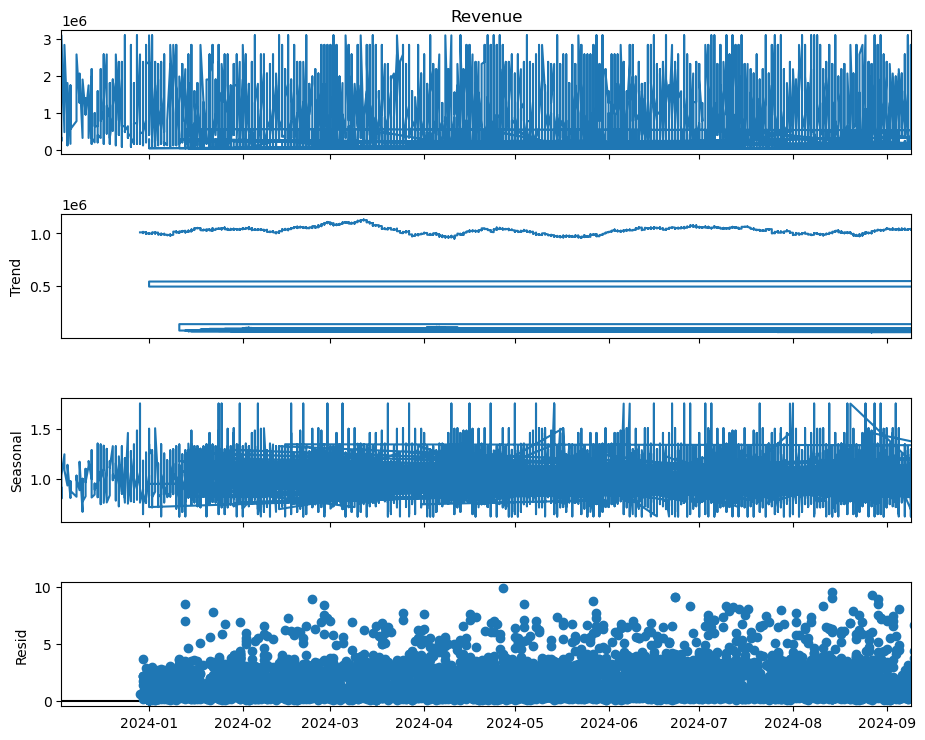

In [111]:
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

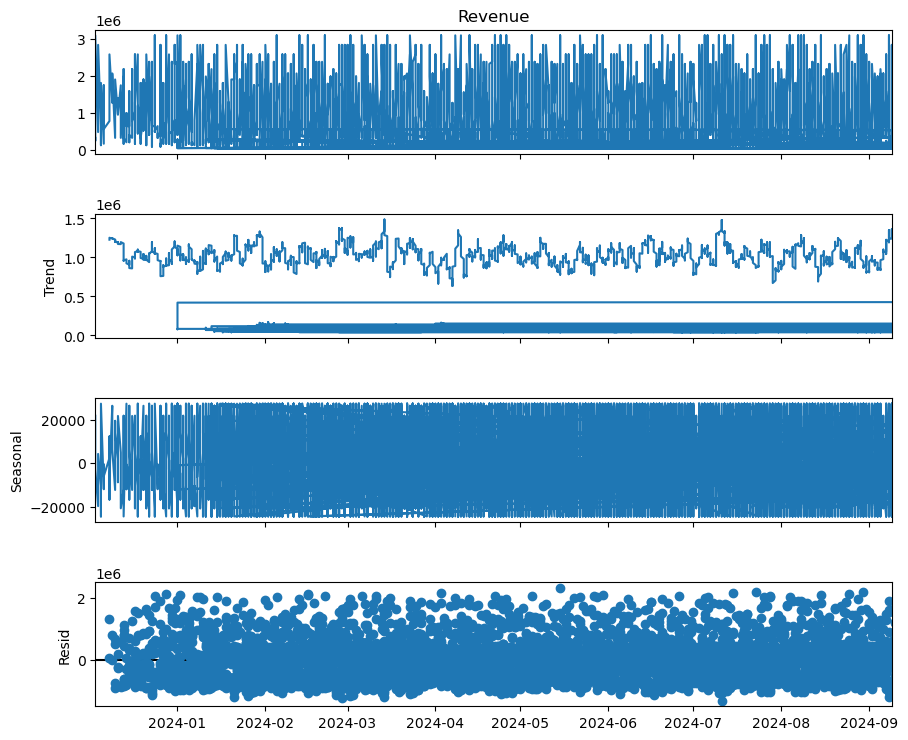

In [112]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


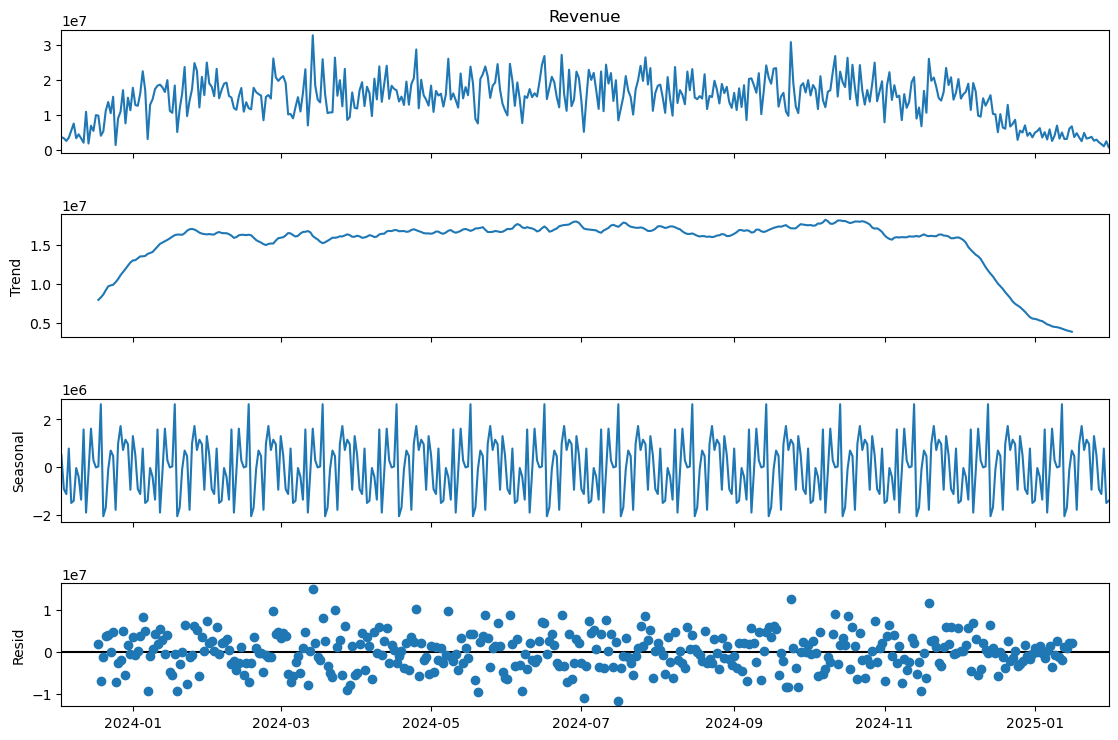

In [ ]:
df_clean = df[df['Revenue'] != 0].copy()

df_clean = df_clean.dropna(subset=['Revenue'])

df_clean = df_clean.groupby(df_clean.index).sum()

df_clean = df_clean.asfreq('D')

df_clean['Revenue'] = df_clean['Revenue'].interpolate()

decomposition = seasonal_decompose(df_clean['Revenue'], model='additive', period=30)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()